<a href="https://colab.research.google.com/github/ustab/BTK-PythonTensorflow/blob/master/mnist_turkce_aciklamali_derin_ogrenmeye_giris_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **$\color{purple}{\text{Derin Öğrenmeye Giriş 1 - MNIST FASHION Veri Seti ile İleri Beslemeli Ağlar  }}$**

*Hi folks, this notebook dedicated to Turkish researchers & deep leaners. Hence, the language is completely Turkish.*

Herkese merhaba, kaggle setlerine ve eğitimlerine devam ediyoruz. Bu notebook ile yapay sinir ağlarına bir giriş yapacağız. Sonrasında Mnist fashion data setini inceleyerek üzerinde basit "ileri beslemeli yapay sinir ağlarını" eğiteceğiz ve hazır modeller kullanmaktan çok kendimizin **Keras** kütüphanesi ile kuracağı modeller üzerinde hiperparemetreler üzerinden değerlendirmeler yapacağız. Derin öğrenmeye başlamak isteyen veya yeni başlamış araştırmacılar için işin temelinden başlanmasını öneririm. Bu notebook tam olarak temele yani matematiğine inmese de o temele inmek için bir kapı olabilir.

İlk olarak, eğitmenli öğretme (supervised learning) yapay sinir ağlarının temelini neyin oluşturuğunu bilmekte fayda var. Hedef değere göre hedef fonksiyonu minimize veya maksimize etme problemi bizi optimizasyon teorisine kadar götürmektedir. En küçük kareler kuralı (least squares method) [1]  hedef değere ulaşmak için hedef fonksiyon katsayılarını optimize eden ilk algoritmalardan birisidir. Bana göre bu işin de ilk çıkış noktası bu olmuştur. Tabi optimizasyon teorisi derin öğrenmenin bir parçası olsa da kimse onu anmamaktadır :/ Oysa geri yayılımda(backprop) kullandığımız gradient descent algoritması ve L2, Adam, RMSprop, Madam gibi momentum algoritmalarının temeli bu matematikten gelmektedir. Es geçmemek gerekir.

![leastsquares](https://www.i2tutorials.com/wp-content/media/2019/11/ordinary-Least-square-method-in-Machine-Learning-i2tutorials.jpg)


Daha sonrasında ise bilinen en eski yapay sinir ağı olan perceptron 1958 yılında Frank Rosenblatt'ın  Cornell Aeronautical Laboratuvarlarındaki çalışmalarında ortaya koyduğu tek nöron yapılı modeldir.Öğrenme kuralı olarak delta kuralı (delta rule) kullanan ileri beslemeli (feedforward) sinir ağı her şeyin başlangıcı olmuştur. Tabi ilk eksikliği XOR problemini çözememesiyle ortaya konulunca çeşitli yenilikler de birbirini takip etti. İlk olarak perceptron aktivizasyon fonksiyonu olarak adım fonksiyonu (step function) kullanmaktaydı. Bu da delta kuralı ile öğrenme aşamasında bir takım sınırlar oluşturmaktaydı. Günümüzde dahi tercih edilen (?) sigmoid fonksiyonu eklendiğinde ise artık XOR problemini çözebilen bir sinir ağımız bulunmaktaydı. İsimleri zaman içinde değişti: Adaline, Madaline gibi. Şirin perceptron aşağıdaki gibidir. Çoklu girişi bulunmakta, nörona bağlayan kollardaki w ağırlıkları ile çarpılmakta ve toplama (sum) fonksiyonuna girmektedir. Sonrasında doğrusal olmayan aktivizasyon fonksiyonu (non-linear activation function) ile çıkış katmanına bağlanmaktadır. Burada doğrusal olmayan aktivizasyon fonksiyonu seçilmesinin ana nedeni, geri yayılım algoritmasında ağırlıklarımızı loss fonksiyonumuzun sonucuna bağlı olarak güncelleyebilmek içindir. Gayet tabi doğrusal bir aktivizasyon fonksiyonu da kullanılabilir ( Ne zamaan? Mesela bağlanım-regression problemlerinde.).

![perceptron](https://www.cc.gatech.edu/~san37/img/dl/perceptron.jpg)

Gel zaman git zaman, basit perceptron yapısına ilave nöronlar eklenerek ileri beslemeli sinir ağları "multilayer perceptron (MLP)" olarak karşımıza çıkıyor. Bu yapılarda giriş ve çıkış katmanları dışında kalan katmanlara gizli katman (hidden layer) adını veriyoruz. Problemin büyüklüğü ve hesaplama maliyetine göre gizli katman sayısı ve her bir gizli katmanda bulunan noron sayısı artış gösterebilmektedir. Çalışmalar göstermektedir ki probleme özgü olarak az sayıda noron ve gizli katman kullanmak ezberleme(over fit - high variance) problemine yol açmaktadır, noron sayısı ve gizli katman sayısı arttıkça başarımın bir yere kadar arttığı ve lokal minimum'lara takılamdan öğrenme gerçekleştirebildiği görünmektedir. Bu çalışmada da bunu bir miktar göstereceğiz. Alt yapısını anlamak isteyen arkadaşlar için önerim matematiğine inmek olacaktır, bunun için şu kaynakları öneririm:

1. Introduction to Machine Learning, Fourth Edition, Ethem Alpaydin
2. Yapay Sinir Ağları Kitap, Prof.Dr.Ercan Öztemel
3. Derin Öğrenme, Ian Goodfellow
4. Python ile Derin Öğrenme, François Chollet


![MLP](https://missinglink.ai/wp-content/uploads/2018/11/multilayer-perceptron.png)


MNIST data setleri temel yapay sinir ağları (ANN, CNN etc.) güzel bir başlangıçtır. Hand written digits ( el yazısı karakterleri) ve fashion olmak üzere en temel 2 veri seti bulunmaktadır. İlk çalışmamızda MNIST Fashion'ı inceleyeceğiz, 2. çalışmamızda ise Convolutional Neural Networks (CNN) ile beraber MNIST El yazısı karakterlerini inceleyeceğiz.

Peki nedir MNSIT Fasion? 10 tane kıyafet sınıfı için toplamda 70000 28x28x1'lik fotoğraflar içeren bir veri setidir. Aşağıda ait olunan sınıfları görebilirsiniz. Amacımız 60000 eğitim seti ile doğru sınıflandırma yapmayı öğrenecek bir yapay sinir ağı geliştirmek ve mümkün olduğunca yüksek bir başarım yakalayabilmek.Sonuç olarak bu kılavuz, 10 kategoride 70.000 gri tonlamalı görüntü içeren Fashion MNIST veri kümesini kullanır. Görüntüler, aşağıda görüldüğü gibi düşük çözünürlükte (28 x 28 piksel) ayrı giyim eşyalarını göstermektedir. Data seti kaggle içerisinde 60000 Training, 10000 Test olarak ayrılmış bulunmaktadır.


![nnsr](https://cdn-images-1.medium.com/max/888/1*-kpgaee9X9Gm-SrQKdk_og.png)



[1] https://en.wikipedia.org/wiki/Least_squares


İhtiyacımız olan kütüphaneleri yüklüyoruz. Temel olarak Tensorflow ve Keras'tan yardım alacağız.

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import tensorflow as tf
import tensorflow.keras

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
!pip install matplotlib-venn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [28]:
import cv2
import numpy as np
from PIL import Image
import os
from tensorflow.keras.utils import to_categorical

In [29]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from keras import optimizers
import tensorflow as tf
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 
#print("tensorflow version is : ", tf.__version__)

Dosyaları okuyoruz, ben tercihen os kütüphanesini kullanıyorum. Train 60000,785 ve Test 10000,785 boyutlarında. Bu şu anlama gelmektedir 60000 train datası var ve bu data 785 boyutlu. 785 boyutun 1 tanenesi label yani doğru etiket, 784 tanesi ise 28x28'lik fotoğrafın piksel değerleri. Gri bir imge olduğundan dolayı her bir pikselin değeri de 0 ila 255 arasında değişmektedir.

In [31]:
path_train=os.path.join("/content/fashion-mnist_train.csv")
path_test=os.path.join("/content/fashion-mnist_test.csv")
print(path_train),print(path_test)
train=pd.read_csv(path_train)
test=pd.read_csv(path_test)

print("train shape: ",train.shape)
print("test shape: ",test.shape)

/content/fashion-mnist_train.csv
/content/fashion-mnist_test.csv
train shape:  (1887, 785)
test shape:  (1886, 785)


In [32]:
train.tail(3)
test.head(3)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103.0,87.0,56.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,0,0,0,0,0,0,0,0,...,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0,0,0,0,0,0,14,53,99,...,0.0,0.0,0.0,0.0,63.0,53.0,31.0,0.0,0.0,0.0


İlk sütunu y train ve y test'e aktarıyoruz. Son durumda x_train piksel değerleri ve x_test ground truth(doğru etiket) ile modelimizi eğiteceğiz. Eğitilmiş modele x_test girdisini vererek eğitilen yapay sinir ağının sonuç vermesini sağlayacağız. Daha sonra y_test'de bulunan doğru etiketler ile validation accuracy yani doğrulama adımı başarımını hesaplayarak modelin görmediği data üstündeki başarımını sorgulayacağız. Burada en önemli olan konu test verisinin train verisine sızmamasıdır. Bundan dolayı öncesinde standartlaştırma kullanılması durumunda fit, fit_transform komutlarına dikkat etmek gerekir. Biz bu çalışmamızda kullanmıyoruz.

In [34]:
y_train=train.iloc[:,:1]
x_train = train.iloc[:,1:]
y_test = test.iloc[:,:1]
x_test = test.iloc[:,1:]

print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
print("x_test shape: ", x_test.shape)
print("y_test shape: ", y_test.shape)


x_train shape:  (1887, 784)
y_train shape:  (1887, 1)
x_test shape:  (1886, 784)
y_test shape:  (1886, 1)


Normalizasyon özellikle farklı boyutlardaki dataları 0 ile 1 arasında dağılım gösterecek şekilde yeniden düzenleme anlamına gelmektedir. Bir çok farklı yöntemi olduğu gibi, biz en büyük değere yani bir pikselin alabileceği en yüksek değer olan 255'e bölerek devam edeceğiz. 

Daha sonrasında bir sıra halinde ( 784 ) olan değerleri yeniden şekillendirerek (reshape) 28x28x1'lik fotoğrafları tekrar oluşturacağız. Bu adımın amacı sadece fotoğrafları görselleştirmektir. Yoksa bu şekilde devam ederek sinir ağı kurabiliriz. Burada reshape yaptığımızdan dolayı göreceksiniz yapay sinir ağlarına "flatten" yani 28x28'lik datayı 784'lük bir giriş vektörüne dönüştürme katmanı ekleyeceğiz.

Bir diğer konu ise hedef değerin durumuna karar vermektir. Ne konuşmuştuk, y değerleri 0'dan 9'a kadar değişiyor ve şu anda y_train.shape[0]=60k, y_test.shape[0]=10k olmak üzere birer vektör halinde. Böyle de devam edebiliriz ama o zaman sinir ağı son katmanımızın (çıkış katmanı) nasıl bir yapıda olacağını iyi düşünmemiz gerekir. Tek bir norondan oluşup 0 ile 9 arasında değer veren bir yapı da inşa edebiliriz, ona göre aktivasyon fonksiyonu ve loss fonksiyonu seçeriz. Ama bunu düşünmeye gerek yok kategorik yapılar için çok ama çok iyi çalışan softmax aktivasyonu ve categorical_crossentropy loss fonskiyonu bu tarz 2'den fazla sınıf bulunan sınıflandırma problemleri için çok güzel çalışmaktadır. Ama softmax'i kullanmak için vektör halinde olan çıktımızı bir array'e dönüştürmemiz gerekiyor. Bu dönüşümlere encoding demekteyiz. Kullanacağımız yapı bir array oalcağından one hot encoding yapısını kullanacağız. Peki bu one hot encoding ne yapıyor? Aşağıdaki resimde de göründüğü üzere kategorik sınıflandırmayı (bu string de olabilir number da) bir vektörden matrixe dönüştürüyor. Bu sayede sonucu makineler daha rahat ifade edebiliyor. Yapay sinir ağları için de tek nöron üstünden tahminlemek yerine, sınıf adeti kadar nöron koyarak tahminlemek daha büyük başarı getiriyor.

![ohe](https://i.imgur.com/mtimFxh.png)

In [38]:
import numpy as np

In [41]:
#normalize

x_train = x_train/255.
x_test  = x_test/255.

#one-hot encoding
num_classes=10
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes)

print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
print("x_test shape: ", x_test.shape)
print("y_test shape: ", y_test.shape)


x_train shape:  (1887, 28, 28, 1)
y_train shape:  (1887, 10, 10, 10)
x_test shape:  (1886, 28, 28, 1)
y_test shape:  (1886, 10, 10, 10)


Aşağıda ilk 16 görseli ve ait oldukları sınıfları çizdiren bir matplotlib kodu bulunmaktadır.

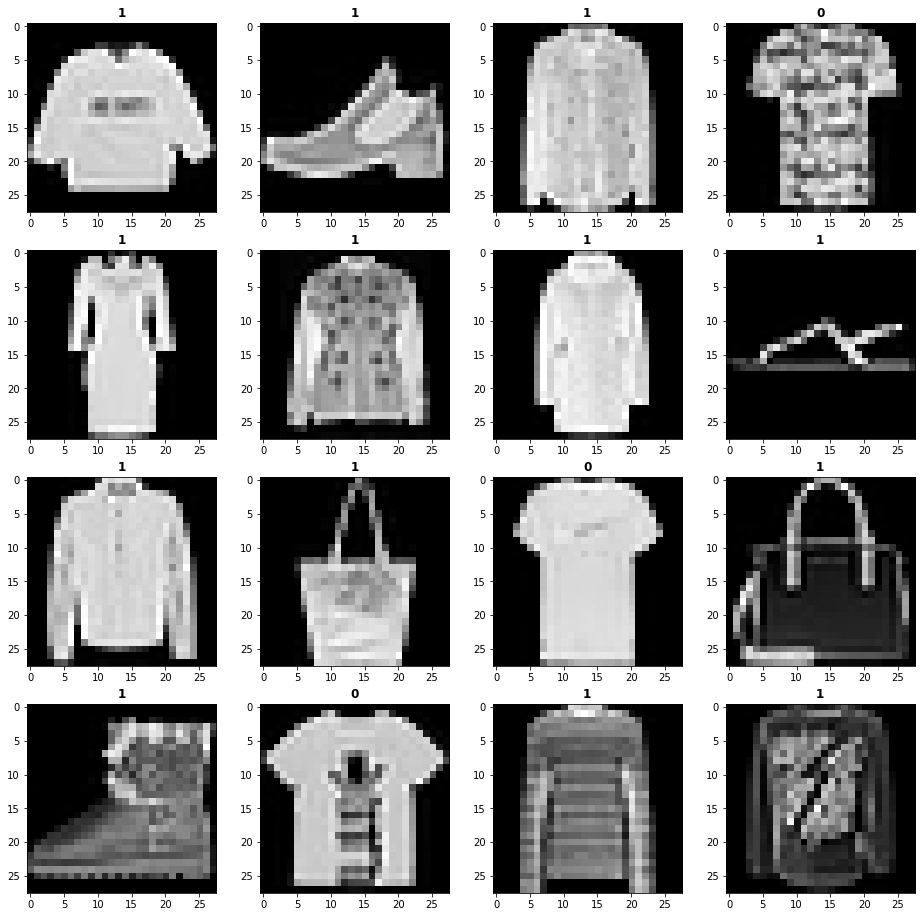

In [43]:
fig = plt.figure(figsize = (16, 16))

for i in range(16):  
    plt.subplot(4,4,1 + i)
    plt.title(np.argmax(y_train[i]),fontname="Times New Roman",fontweight="bold")
    plt.imshow(x_train[i,:,:,0], cmap=plt.get_cmap('gray'))
plt.show()

Şimdi bu kod çok önemli değil, bu olmasa da çalışır kodumuz ama temel olarak imgelerin farklı formatları olabiliyor. Bu formatlardan bazıları kanal sayısını ilk başta ifade ediyor, böyle bir imge var ise hizalamak için böyle bir kod yazılmakta. Sonuç olarak yapay sinir ağına girişimiz için imgelerin hepsi 28x28x1 boyutunda. Eğer konvolasyonel sinir ağı (CNN) kullanmayacak isek bu array'i yukarda bahsettiğim gibi vektöre çevireceğiz. CNN'ler "MNIST Turkce Aciklamali Derin Ogrenmeye Giris - 2" çalışmasının konusu olacaktır.

In [44]:
img_rows = 28
img_cols = 28
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print (input_shape)

(28, 28, 1)


Hiper parametreler deneme yanılma ile probleme özgü bulmamız gereken parametrelerdir. Bunlar için temel değerler tanımladım. İleride her birisini tek tek açıklarım belki :)

In [45]:
#Hyper Parameters
batch_size = 128
num_classes = 10
epochs = 20
learning_rate=0.001


ilk modelimiz oldukça küçük bir sinir ağı. 2 Gizli katmanımız bulunuyor. İlki 8 nöronlu ve aktivizasyon olarak sigmoid fonksiyonu kullandık. Buradan sonra bir çok model deneyerek, hiper parametrelerle oynayarak sonuçları gözlemleyeceğiz.

* input -> 8 -> sigmoid ->16 -> sigmoid -> softmax

Başarım:   0.849 ( Val Acc.) --> Yüksek görünse de en yüksek skorların 0.99-1.00 arasında değiştiğini düşündüğümüzde büyük fark olduğu görünmektedir.

In [47]:
modela = Sequential()
modela.add(Flatten(input_shape=input_shape))

modela.add(Dense(8, activation='sigmoid'))

modela.add(Dense(16, activation='sigmoid'))

modela.add(Dense(num_classes, activation='softmax'))

In [48]:
adam=tensorflow.keras.optimizers.Adam(lr=learning_rate)
modela.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
modela.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 8)                 6280      
                                                                 
 dense_4 (Dense)             (None, 16)                144       
                                                                 
 dense_5 (Dense)             (None, 10)                170       
                                                                 
Total params: 6,594
Trainable params: 6,594
Non-trainable params: 0
_________________________________________________________________


* input -> 512 -> tanh ->1024 -> tanh -> 1024 -> tanh -> softmax

Başarım:   0.894 ( Val Acc.)

In [61]:
print("learn rate: ",learning_rate, ",epochs: ", epochs)

model = Sequential()
model.add(Flatten(input_shape=input_shape))
model.add(Dense(512, activation='tanh'))
model.add(Dense(1024, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

adam=tensorflow.keras.optimizers.Adam(lr=learning_rate)
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
model.summary()

learn rate:  0.001 ,epochs:  20
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 512)               401920    
                                                                 
 dense_11 (Dense)            (None, 1024)              525312    
                                                                 
 dropout_2 (Dropout)         (None, 1024)              0         
                                                                 
 dense_12 (Dense)            (None, 1024)              1049600   
                                                                 
 dropout_3 (Dropout)         (None, 1024)              0         
                                                                 
 dense_13 (Dense)     

* input --> 512-> relu -> 1024 ->relu -> 1024 -> relu -> Softmax, optimizer = adam

Başarım:   0.898 ( Val Acc.)

In [65]:
model2 = Sequential()
model2.add(Flatten(input_shape=input_shape))
model2.add(Dense(512, activation='relu'))
model2.add(Dense(1024, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(1024, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(num_classes, activation='softmax'))

In [68]:
adam=tensorflow.keras.optimizers.Adam(lr=learning_rate)
model2.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
model2.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_22 (Dense)            (None, 512)               401920    
                                                                 
 dense_23 (Dense)            (None, 1024)              525312    
                                                                 
 dropout_8 (Dropout)         (None, 1024)              0         
                                                                 
 dense_24 (Dense)            (None, 1024)              1049600   
                                                                 
 dropout_9 (Dropout)         (None, 1024)              0         
                                                                 
 dense_25 (Dense)            (None, 10)               

* input --> 512 --> relu --> 1024 --> relu --> 1024 --> softmax, oprimizer= RMSprop

Başarım:  0.889 ( Val Acc.)

In [76]:
model3 = Sequential()
model3.add(Flatten(input_shape=input_shape))
model3.add(Dense(512, activation='relu'))
model3.add(Dense(1024, activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(1024, activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(num_classes, activation='softmax'))

In [79]:
RMS=tensorflow.keras.optimizers.RMSprop(lr=learning_rate)
model3.compile(loss='categorical_crossentropy', optimizer=RMS,metrics=['accuracy'])
model3.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_30 (Dense)            (None, 512)               401920    
                                                                 
 dense_31 (Dense)            (None, 1024)              525312    
                                                                 
 dropout_12 (Dropout)        (None, 1024)              0         
                                                                 
 dense_32 (Dense)            (None, 1024)              1049600   
                                                                 
 dropout_13 (Dropout)        (None, 1024)              0         
                                                                 
 dense_33 (Dense)            (None, 10)               

 Başarım: 0.893

In [81]:
model4 = Sequential()
model4.add(Flatten(input_shape=input_shape))
model4.add(Dense(1024, activation='relu'))

model4.add(Dense(2048, activation='relu'))
model4.add(Dropout(0.2))
model4.add(Dense(1024, activation='relu'))
model4.add(Dropout(0.2))
model4.add(Dense(512, activation='relu'))
model4.add(Dense(num_classes, activation='softmax'))

In [82]:
adam=tensorflow.keras.optimizers.Adam(lr=learning_rate)
model2.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

model4.compile(loss='categorical_crossentropy', optimizer=adam,metrics=['accuracy'])

model4.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_34 (Dense)            (None, 1024)              803840    
                                                                 
 dense_35 (Dense)            (None, 2048)              2099200   
                                                                 
 dropout_14 (Dropout)        (None, 2048)              0         
                                                                 
 dense_36 (Dense)            (None, 1024)              2098176   
                                                                 
 dropout_15 (Dropout)        (None, 1024)              0         
                                                                 
 dense_37 (Dense)            (None, 512)              